
# Get the data

This is a simple guide on how to download the data using [this API](https://github.com/individual-brain-charting/api). You can also find the reference for the API [here](https://individual-brain-charting.github.io/docs/ibc_api.html).


Import this tool as follows:

In [1]:
import ibc_api.utils as ibc

[siibra:INFO] Version: 0.4a47
[siibra:WARNING] This is a development release. Use at your own risk.
[siibra:INFO] Please file bugs and issues at https://github.com/FZJ-INM1-BDA/siibra-python.
[siibra:INFO] Clearing siibra cache at /home/himanshu/.cache/siibra.retrieval


Then authenticate with EBRAINS. This will return a link that takes you to EBRAINS login page and stores an access token locally.



In [2]:
ibc.authenticate()

***
To continue, please go to https://iam.ebrains.eu/auth/realms/hbp/device?user_code=SEBC-RHFZ
***
ebrains token successfuly set.


To see what is available for a given data type on IBC, we need fetch the file that contains that information.
The following loads a CSV file with all that info as a pandas dataframe and
saves it as ``ibc_data/available_statistic_map.csv``.

Let's do that for IBC statistic maps.



In [3]:
db = ibc.get_info(data_type="statistic_map")

[siibra:INFO] 33194 objects found for dataset 07ab1665-73b0-40c5-800e-557bc319109d returned.


Let's see what's in the database



In [4]:
db

,modality,image_type,map_type,study,task,analysis_level,number_of_subjects,tags,cognitive_paradigm_cogatlas,cognitive_paradigm_description_url,contrast_definition,path,subject
0,fMRI-BOLD,statistic_map,Z,IBC,ArchiStandard,S,1,"visual_sentence_comprehension, response_select...",trm_5873cd1c9d4c4,http://www.cognitiveatlas.org/task/id/trm_5873...,left hand button presses upon video instructions,sub-01_ses-00_task-ArchiStandard_dir-ap_space-...,sub-01
1,fMRI-BOLD,statistic_map,Z,IBC,ArchiStandard,S,1,"visual_sentence_comprehension, response_select...",trm_5873cd1c9d4c4,http://www.cognitiveatlas.org/task/id/trm_5873...,left hand button presses upon video instructions,sub-01_ses-07_task-ArchiStandard_dir-ap_space-...,sub-01
2,fMRI-BOLD,statistic_map,Z,IBC,ArchiStandard,S,1,"visual_sentence_comprehension, response_select...",trm_5873cd1c9d4c4,http://www.cognitiveatlas.org/task/id/trm_5873...,right hand button presses upon video instructions,sub-01_ses-00_task-ArchiStandard_dir-ap_space-...,sub-01
3,fMRI-BOLD,statistic_map,Z,IBC,ArchiStandard,S,1,"visual_sentence_comprehension, response_select...",trm_5873cd1c9d4c4,http://www.cognitiveatlas.org/task/id/trm_5873...,right hand button presses upon video instructions,sub-01_ses-07_task-ArchiStandard_dir-ap_space-...,sub-01
4,fMRI-BOLD,statistic_map,Z,IBC,ArchiStandard,S,1,"auditory_sentence_comprehension, response_sele...",trm_5873cd1c9d4c4,http://www.cognitiveatlas.org/task/id/trm_5873...,left hand button presses upon audio instructions,sub-01_ses-00_task-ArchiStandard_dir-ap_space-...,sub-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18393,fMRI-BOLD,statistic_map,Z,IBC,MathLanguage,S,1,theory-of-mind,trm_55217a9f473f0,http://www.cognitiveatlas.org/task/id/trm_5521...,NaN,sub-15_ses-30_task-MathLanguage_dir-ffx_space-...,sub-15
18394,fMRI-BOLD,statistic_map,Z,IBC,MathLanguage,S,1,NaN,trm_55217a9f473f0,http://www.cognitiveatlas.org/task/id/trm_5521...,NaN,sub-15_ses-30_task-MathLanguage_dir-ffx_space-...,sub-15
18395,fMRI-BOLD,statistic_map,Z,IBC,MathLanguage,S,1,theory-of-mind,trm_55217a9f473f0,http://www.cognitiveatlas.org/task/id/trm_5521...,NaN,sub-15_ses-30_task-MathLanguage_dir-ffx_space-...,sub-15
18396,fMRI-BOLD,statistic_map,Z,IBC,MathLanguage,S,1,NaN,trm_55217a9f473f0,http://www.cognitiveatlas.org/task/id/trm_5521...,NaN,sub-15_ses-30_task-MathLanguage_dir-ffx_space-...,sub-15


There are over 18000 statistic maps available for download.
But since it's a pandas dataframe, we can filter it to get just what we want.
Let's see how many statistic maps are available for each task.



In [5]:
db["task"].value_counts()

Audio                  2793
ArchiStandard          1794
RSVPLanguage           1729
Audi                   1488
MTTWE                   988
MTTNS                   912
ArchiSocial             702
Self                    660
Visu                    576
ArchiSpatial            546
ArchiEmotional          546
HcpWm                   546
HcpMotor                429
MVEB                    396
MathLanguage            390
DotPatterns             363
WardAndAllport          330
MCSE                    324
Moto                    324
MVIS                    216
Lec1                    216
VSTM                    180
HcpGambling             156
HcpEmotion              156
HcpLanguage             156
HcpSocial               117
HcpRelational           117
PreferenceFaces         111
Enumeration             108
Lec2                    108
PreferenceFood          108
PainMovie               108
EmotionalPain           108
TheoryOfMind            108
PreferenceHouses        108
PreferencePaintings 

You can find the descriptions of all these tasks [here](https://individual-brain-charting.github.io/docs/tasks.html).



For this example, let's just download the 6 maps from Discount task. You can filter the maps for a task like this.



In [6]:
filtered_db = ibc.filter_data(db, task_list=["Discount"])
filtered_db

,modality,image_type,map_type,study,task,analysis_level,number_of_subjects,tags,cognitive_paradigm_cogatlas,cognitive_paradigm_description_url,contrast_definition,path,subject
3183,fMRI-BOLD,statistic_map,Z,IBC,Discount,S,1,"response_conflict, selective_control",trm_566748c929afc,http://www.cognitiveatlas.org/task/id/trm_5667...,effect of delay on reward,sub-08_ses-27_task-Discount_dir-ap_space-MNI15...,sub-08
3184,fMRI-BOLD,statistic_map,Z,IBC,Discount,S,1,"incentive salience, selective_control",trm_566748c929afc,http://www.cognitiveatlas.org/task/id/trm_5667...,effect of reward gain,sub-08_ses-27_task-Discount_dir-ap_space-MNI15...,sub-08
9809,fMRI-BOLD,statistic_map,Z,IBC,Discount,S,1,"response_conflict, selective_control",trm_566748c929afc,http://www.cognitiveatlas.org/task/id/trm_5667...,effect of delay on reward,sub-08_ses-27_task-Discount_dir-pa_space-MNI15...,sub-08
9810,fMRI-BOLD,statistic_map,Z,IBC,Discount,S,1,"incentive salience, selective_control",trm_566748c929afc,http://www.cognitiveatlas.org/task/id/trm_5667...,effect of reward gain,sub-08_ses-27_task-Discount_dir-pa_space-MNI15...,sub-08
15823,fMRI-BOLD,statistic_map,Z,IBC,Discount,S,1,"response_conflict, selective_control",trm_566748c929afc,http://www.cognitiveatlas.org/task/id/trm_5667...,effect of delay on reward,sub-08_ses-27_task-Discount_dir-ffx_space-MNI1...,sub-08
15824,fMRI-BOLD,statistic_map,Z,IBC,Discount,S,1,"incentive salience, selective_control",trm_566748c929afc,http://www.cognitiveatlas.org/task/id/trm_5667...,effect of reward gain,sub-08_ses-27_task-Discount_dir-ffx_space-MNI1...,sub-08


Now we are ready to download the few selected maps that we filtered.

The following will save the requested maps under
``ibc_data/resulting_smooth_maps/sub-08/task-Discount`` 
(or whatever subject you chose). And will also create a local CSV file ``ibc_data/downloaded_statistic_map.csv`` to track the downloaded files. This will contain local file paths and the time they were downloaded at, and is updated everytime you download new files.


In [7]:
downloaded_db = ibc.download_data(filtered_db, organise_by='task')
downloaded_db

[siibra:INFO] 33194 objects found for dataset 07ab1665-73b0-40c5-800e-557bc319109d returned.
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:05<00:00,  1.15it/s]

Downloaded requested files from IBC statistic_map dataset. See ibc_data/downloaded_statistic_map.csv for details.


,local_path,downloaded_on
0,ibc_data/resulting_smooth_maps/sub-08/task-Dis...,2023-05-12 11:36:49.203279
1,ibc_data/resulting_smooth_maps/sub-08/task-Dis...,2023-05-12 11:36:50.066253
2,ibc_data/resulting_smooth_maps/sub-08/task-Dis...,2023-05-12 11:36:50.994438
3,ibc_data/resulting_smooth_maps/sub-08/task-Dis...,2023-05-12 11:36:51.869514
4,ibc_data/resulting_smooth_maps/sub-08/task-Dis...,2023-05-12 11:36:52.702647
5,ibc_data/resulting_smooth_maps/sub-08/task-Dis...,2023-05-12 11:36:53.589603


Let's try plotting one of these contrast maps

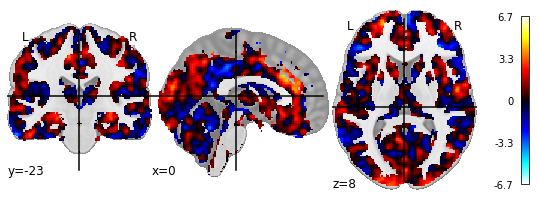

In [8]:
from nilearn.plotting import plot_stat_map

map_path = downloaded_db["local_path"][0]
plot_stat_map(map_path)